#“Analisis Pola Kemunculan Lagu pada Mode Shuffle Spotify Menggunakan Pendekatan Matematika Diskrit”

ANGGOTA KELOMPOK :
- FEBRIANI YOLANDA TESSALONIKA 24083010037
- MUHAMMAD NAUFAL ASRUZZAMAN 24083010084
- LAUDYA MEITANEIA SIANTURI 24083010089


##Latar Belakang

Aplikasi musik digital menyediakan fitur shuffle yang dirancang untuk memutar lagu secara acak. Namun, dalam praktiknya, banyak pengguna merasakan bahwa beberapa lagu muncul lebih sering dibandingkan lagu lainnya. Fenomena ini menimbulkan pertanyaan mengenai sejauh mana proses shuffle benar-benar bersifat acak serta apakah terdapat pola matematika tertentu dalam kemunculan lagu-lagu tersebut.

Dengan menggunakan pendekatan matematika diskrit—khususnya teori himpunan, kombinatorik, distribusi frekuensi, dan probabilitas—fenomena ini dapat dianalisis secara sistematis. Pendekatan ini memungkinkan peneliti untuk mengukur sebaran lagu yang muncul, menemukan adanya pola pengulangan, serta menentukan tingkat keacakan dari hasil shuffle.

Analisis terhadap pola shuffle bukan hanya relevan dari sisi matematis, tetapi juga penting bagi pengembangan sistem rekomendasi musik. Pemahaman tentang distribusi dan probabilitas munculnya lagu dapat membantu mengevaluasi algoritma shuffle yang digunakan oleh platform musik, sehingga pengalaman pengguna dapat ditingkatkan.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from collections import Counter, defaultdict
import seaborn as sns
import networkx as nx
import math
from scipy import stats

try:
    # Load the CSV with header=None to treat the first row as data
    df = pd.read_csv('Judul Lagu.csv', encoding='latin1', header=None)
    print("Successfully loaded with 'latin1' encoding.")
except UnicodeDecodeError:
    print("'latin1' encoding failed, trying 'cp1252'.")
    df = pd.read_csv('Judul Lagu.csv', encoding='cp1252', header=None)
    print("Successfully loaded with 'cp1252' encoding.")
except FileNotFoundError:
    print("Error: 'Judul Lagu.csv' not found. Please ensure the file is uploaded or the path is correct.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

df

Successfully loaded with 'latin1' encoding.


0                  1                           2   \
0              Shuffle 1                NaN                         NaN   
1                  Title             Artist                       Genre   
2              Batter Up        BABYMONSTER            K-pop Girl Crush   
3          Pretty Savage          BLACKPINK               K-pop Hip-Hop   
4            Dalla Dalla               ITZY            K-pop Girl Crush   
5            Antifragile        LE SSERAFIM          K-pop Latin Fusion   
6             Super Lady           (G)I-DLE               K-pop Pop EDM   
7              Typa Girl          BLACKPINK                  K-pop Trap   
8             Next Level              AESPA                   K-pop EDM   
9                  Adios           EVERGLOW            K-pop Girl Crush   
10           Stamp On It       Got The Beat                   K-pop EDM   
11      Bon Bon Chocolat           EVERGLOW                   K-pop EDM   
12        Kill This Love          BLACKPINK            K-pop Girl Crush   
13                Tomboy           (G)I-DLE                  K-pop Rock   
14  Mafia In The Morning               ITZY               K-pop Hip-Hop   
15                 Spicy              AESPA             K-pop Dance Pop   
16  PTT (Paint The Town)              LOONA      K-pop Bollywood Fusion   
17             Step Back       Got The Beat               K-pop Hip-Hop   
18            Pink Venom          BLACKPINK               K-pop Hip-Hop   
19             You Think  Girls Generation                   K-pop Pop   
20           Black Mamba              AESPA                 K-pop Dance   
21              La Di Da           EVERGLOW             Synthwave K-pop   
22              Fearless        LE SSERAFIM                   K-pop Pop   
23                 Drama              AESPA               K-pop Hip-Hop   
24               Dun Dun           EVERGLOW                   K-pop EDM   
25               Not Shy               ITZY                   K-pop Pop   
26                 Uh-Oh           (G)I-DLE               K-pop Hip-Hop   
27                Savage              AESPA              K-pop Hyperpop   
28                 Power         Little Mix                     Pop EDM   
29           Joan of Arc         Little Mix                    Pop Trap   
30           Stamp on It       Got The Beat                   K-pop EDM   
31              Snapping            Chungha                   K-pop Pop   
32         Woman Like Me         Little Mix                     Pop R&B   
33                 Crazy            4MINUTE            K-pop Girl Crush   
34                  Hate            4MINUTE               K-pop Hip-Hop   
35                  Boss              NCT U               K-pop Hip-Hop   
36            Gods Menu         Stray Kids  K-pop Experimental Hip-Hop   
37                   HIT          SEVENTEEN                   K-pop EDM   
38               Jopping             SuperM           K-pop Stadium Pop   
39          Tiger Inside             SuperM                   K-pop EDM   
40            Superhuman            NCT 127               K-pop Electro   
41               Sticker            NCT 127          K-pop Experimental   
42               Wannabe               ITZY             K-pop Dance Pop   
43        La Vie en Rose             IZ*ONE                   K-pop Pop   
44               Bad Boy         Red Velvet                   K-pop R&B   
45                Psycho         Red Velvet                   K-pop R&B   
46                   RBB         Red Velvet           K-pop Hip-Hop Pop   
47  Dance The Night Away              TWICE                 K-pop Dance   
48       I Cant Stop Me              TWICE             K-pop Synthwave   
49              Gotta Go            Chungha                 K-pop Dance   
50             Moonlight                HYO                   K-pop EDM   
51                 Uh-Oh           (G)I-DLE               K-pop Hip-Hop   

                              3               

In [ ]:
# Define the number of shuffles based on observation (4 shuffles in total)
num_shuffles = 4

all_shuffles_long_format = []

for i in range(num_shuffles):
    start_col_idx = i * 3
    end_col_idx = start_col_idx + 3

    # Select columns for the current shuffle group (e.g., Shuffle 1, Unnamed: 1, Unnamed: 2)
    # and assign generic column names ('title', 'artist', 'genre')
    # Exclude the first row (df.iloc[0]) as it contains the sub-headers which are now used for column names
    temp_df = df.iloc[1:, start_col_idx:end_col_idx].copy()
    temp_df.columns = ['title', 'artist', 'genre'] # Standardize column names

    # Drop rows where 'title' is missing, as these are empty song entries for this shuffle
    temp_df = temp_df.dropna(subset=['title'])

    # Convert columns to string type to avoid mixed type warnings later
    temp_df['title'] = temp_df['title'].astype(str)
    temp_df['artist'] = temp_df['artist'].astype(str)
    temp_df['genre'] = temp_df['genre'].astype(str)

    # Add a position column (1-based index) for analysis
    temp_df['position'] = range(1, len(temp_df) + 1)

    all_shuffles_long_format.append(temp_df)

# Concatenate all processed shuffles into a single DataFrame
df_cleaned = pd.concat(all_shuffles_long_format, ignore_index=True)

print("Data restructured and cleaned.")
# Memeriksa jumlah NaN lagi setelah pembersihan
print("\nJumlah NaN setelah dropna() dan restrukturisasi:")
print(df_cleaned.isna().sum())

df_cleaned.head()

Data restructured and cleaned.

Jumlah NaN setelah dropna() dan restrukturisasi:
title       0
artist      0
genre       0
position    0
dtype: int64


title       artist               genre  position
0          Title       Artist               Genre         1
1      Batter Up  BABYMONSTER    K-pop Girl Crush         2
2  Pretty Savage    BLACKPINK       K-pop Hip-Hop         3
3    Dalla Dalla         ITZY    K-pop Girl Crush         4
4    Antifragile  LE SSERAFIM  K-pop Latin Fusion         5

In [ ]:
# ==== ANALISIS DARI df_cleaned ====
# Pastikan df_cleaned sudah tersedia dan memiliki kolom 'title', 'artist', 'genre'

if 'df_cleaned' in locals() and not df_cleaned.empty:
    # Filter out header rows that might have been concatenated.
    # These rows typically have 'Title', 'Artist', 'Genre' as values.
    # Using lowercase 'title', 'artist', 'genre' as defined in cfc76db9.
    df_filtered = df_cleaned[
        (df_cleaned['title'] != 'Title') &
        (df_cleaned['artist'] != 'Artist') &
        (df_cleaned['genre'] != 'Genre')
    ].copy()

    # Convert columns to string type to avoid issues with mixed types, if not already done
    # This step is already in cfc76db9 but kept for robustness if df_cleaned state is inconsistent
    df_filtered['title'] = df_filtered['title'].astype(str)
    df_filtered['artist'] = df_filtered['artist'].astype(str)
    df_filtered['genre'] = df_filtered['genre'].astype(str)

    # ==== HITUNG LAGU, ARTIS, GENRE UNIK ====
    unique_songs = df_filtered['title'].unique()
    unique_artists = df_filtered['artist'].unique()
    unique_genres = df_filtered['genre'].unique()

    # Assuming num_shuffles is available from the previous processing step (cfc76db9)
    # If not defined globally, this would need to be passed or re-calculated.
    # From kernel state: num_shuffles = 4
    # Let's assume num_shuffles from the previous cell is still valid.
    num_shuffles_processed = 4 # Hardcoding based on previous cell's context

    print("\n==== HASIL PERHITUNGAN ====")
    print("Total lagu unik:", len(unique_songs))
    print("Total artis unik:", len(unique_artists))
    print("Total genre unik:", len(unique_genres))
    print("Jumlah shuffle (berdasarkan proses awal):", num_shuffles_processed)

else:
    print("Error: 'df_cleaned' not found or is empty. Cannot perform analysis.")


==== HASIL PERHITUNGAN ====
Total lagu unik: 188
Total artis unik: 116
Total genre unik: 57
Jumlah shuffle (berdasarkan proses awal): 4


### Ringkasan Data Sederhana

Berdasarkan data lagu yang telah dibersihkan:
- **Total Lagu Unik:** 188
- **Total Artis Unik:** 116
- **Total Genre Unik:** 57

Ini menunjukkan bahwa dataset mencakup berbagai macam musik dengan banyak artis dan genre yang berbeda.

Berikut adalah beberapa baris pertama dari data yang sudah dibersihkan untuk referensi:

In [ ]:
display(df_filtered.head())

title       artist               genre  position
1      Batter Up  BABYMONSTER    K-pop Girl Crush         2
2  Pretty Savage    BLACKPINK       K-pop Hip-Hop         3
3    Dalla Dalla         ITZY    K-pop Girl Crush         4
4    Antifragile  LE SSERAFIM  K-pop Latin Fusion         5
5     Super Lady     (G)I-DLE       K-pop Pop EDM         6

/tmp/ipython-input-3674505442.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


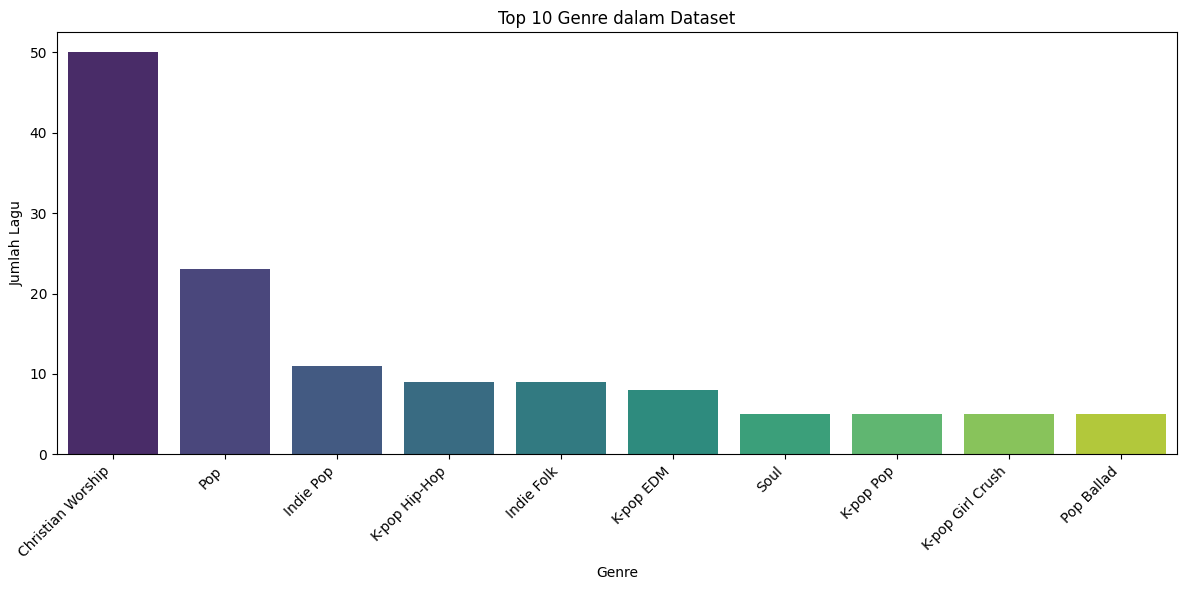

In [ ]:
# Visualisasi top 10 genre
genre_counts = df_filtered['genre'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Top 10 Genre dalam Dataset')
plt.xlabel('Genre')
plt.ylabel('Jumlah Lagu')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Grafik batang ini menunjukkan 10 genre musik dengan jumlah lagu terbanyak. Ini membantu kita melihat tren genre yang paling sering muncul. Misalnya, jika 'K-pop' atau 'Pop' memiliki batang yang sangat tinggi, itu berarti genre-genre tersebut sangat dominan dalam koleksi Anda. Ini adalah cara cepat untuk mengidentifikasi preferensi genre yang paling menonjol.

/tmp/ipython-input-1252523826.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_counts.index, y=artist_counts.values, palette='magma')


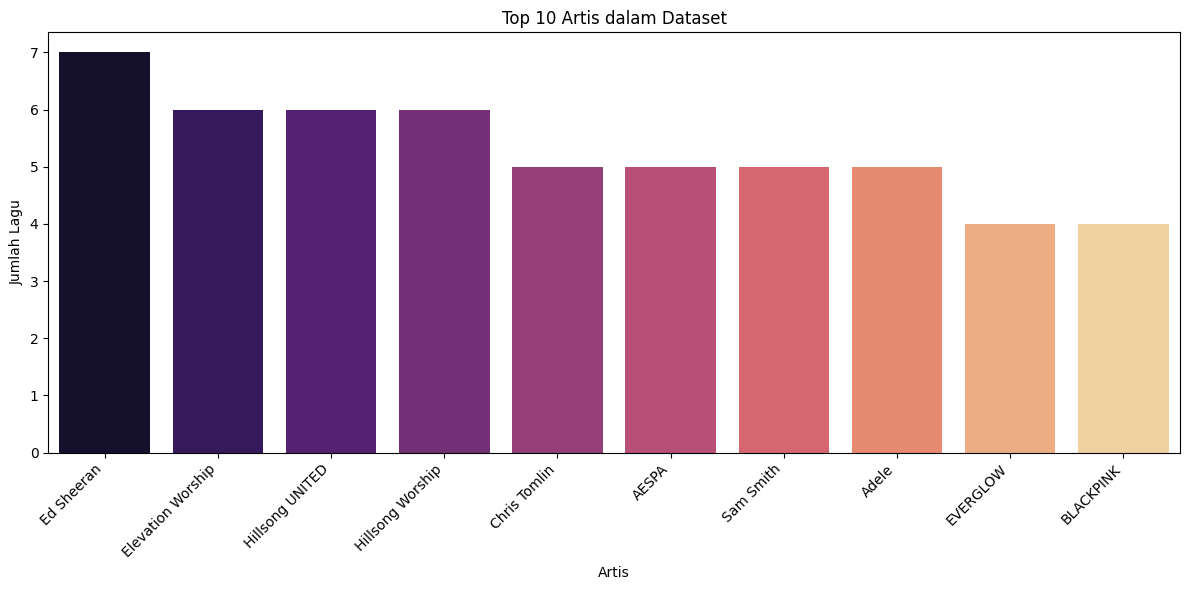

In [ ]:
# Visualisasi top 10 artis
artist_counts = df_filtered['artist'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=artist_counts.index, y=artist_counts.values, palette='magma')
plt.title('Top 10 Artis dalam Dataset')
plt.xlabel('Artis')
plt.ylabel('Jumlah Lagu')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Sama seperti genre, grafik batang ini menampilkan 10 artis yang paling sering muncul dalam dataset. Jika seorang artis memiliki banyak lagu dalam koleksi, grafiknya akan terlihat paling tinggi. Ini mengindikasikan artis-artis favorit atau yang paling banyak direkomendasikan/didengar dalam konteks data ini.

### Uji Chi-kuadrat (Goodness of Fit) untuk Genre dan Artis

Uji Chi-kuadrat Goodness of Fit dilakukan untuk menentukan apakah distribusi frekuensi genre dan artis yang diamati berbeda secara signifikan dari distribusi yang diharapkan. Dalam kasus ini, hipotesis nol (H0) adalah bahwa genre dan artis terdistribusi secara seragam, yang berarti setiap genre atau artis diharapkan memiliki jumlah lagu yang sama rata.

In [ ]:
# Asumsi df_filtered sudah tersedia dari langkah sebelumnya

# --- Uji Chi-kuadrat untuk Distribusi Genre ---
genre_counts_full = df_filtered['genre'].value_counts()
total_songs = df_filtered.shape[0]
num_unique_genres = len(genre_counts_full)
expected_frequency_per_genre = total_songs / num_unique_genres

chi2_genre, p_genre = chisquare(f_obs=genre_counts_full.values, f_exp=expected_frequency_per_genre)

print("==== Hasil Uji Chi-kuadrat untuk Distribusi Genre ====")
print(f"Total lagu: {total_songs}")
print(f"Jumlah genre unik: {num_unique_genres}")
print(f"Frekuensi yang diharapkan per genre (jika seragam): {expected_frequency_per_genre:.2f}")
print(f"Statistik Chi2: {chi2_genre:.2f}")
print(f"Nilai p: {p_genre:.3f}")
if p_genre < 0.05:
    print("Kesimpulan: Distribusi genre yang diamati berbeda secara signifikan dari distribusi seragam (Tolak H0).")
else:
    print("Kesimpulan: Distribusi genre yang diamati tidak berbeda secara signifikan dari distribusi seragam (Gagal menolak H0).")

# --- Uji Chi-kuadrat untuk Distribusi Artis ---
artist_counts_full = df_filtered['artist'].value_counts()
num_unique_artists = len(artist_counts_full)
expected_frequency_per_artist = total_songs / num_unique_artists

chi2_artist, p_artist = chisquare(f_obs=artist_counts_full.values, f_exp=expected_frequency_per_artist)

print("\n==== Hasil Uji Chi-kuadrat untuk Distribusi Artis ====")
print(f"Total lagu: {total_songs}")
print(f"Jumlah artis unik: {num_unique_artists}")
print(f"Frekuensi yang diharapkan per artis (jika seragam): {expected_frequency_per_artist:.2f}")
print(f"Statistik Chi2: {chi2_artist:.2f}")
print(f"Nilai p: {p_artist:.3f}")
if p_artist < 0.05:
    print("Kesimpulan: Distribusi artis yang diamati berbeda secara signifikan dari distribusi seragam (Tolak H0).")
else:
    print("Kesimpulan: Distribusi artis yang diamati tidak berbeda secara signifikan dari distribusi seragam (Gagal menolak H0).")

==== Hasil Uji Chi-kuadrat untuk Distribusi Genre ====
Total lagu: 200
Jumlah genre unik: 57
Frekuensi yang diharapkan per genre (jika seragam): 3.51
Statistik Chi2: 831.70
Nilai p: 0.000
Kesimpulan: Distribusi genre yang diamati berbeda secara signifikan dari distribusi seragam (Tolak H0).

==== Hasil Uji Chi-kuadrat untuk Distribusi Artis ====
Total lagu: 200
Jumlah artis unik: 116
Frekuensi yang diharapkan per artis (jika seragam): 1.72
Statistik Chi2: 117.84
Nilai p: 0.409
Kesimpulan: Distribusi artis yang diamati tidak berbeda secara signifikan dari distribusi seragam (Gagal menolak H0).


/tmp/ipython-input-3912624138.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genre', y='observed', data=viz_df_genre_top, palette='viridis')


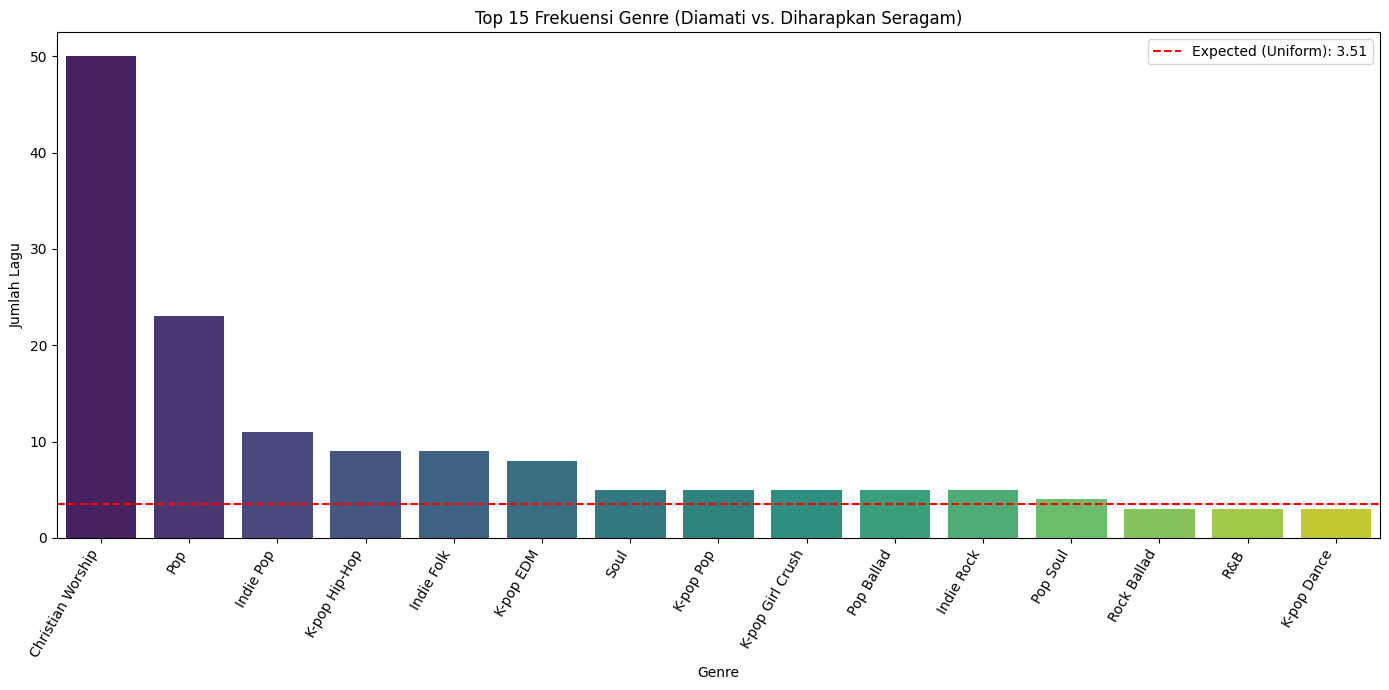

/tmp/ipython-input-3912624138.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='artist', y='observed', data=viz_df_artist_top, palette='magma')


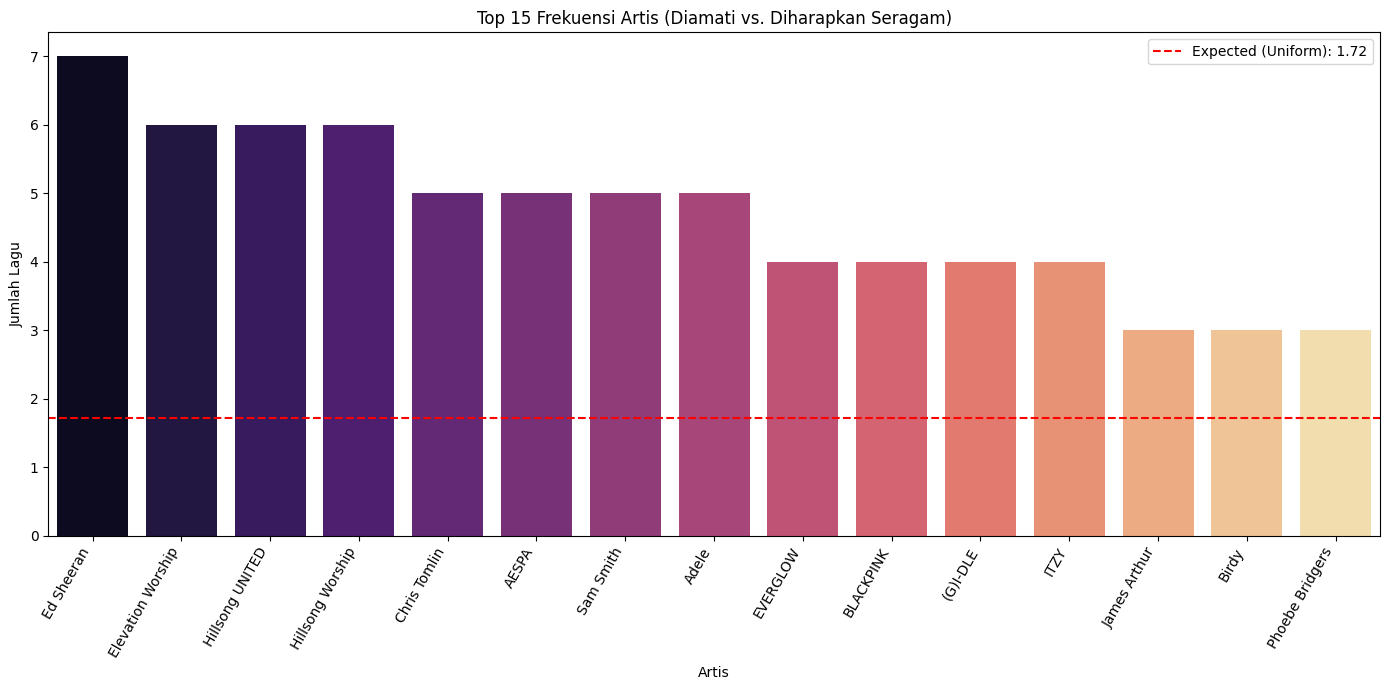

In [ ]:
# Siapkan data untuk visualisasi genre
viz_df_genre = pd.DataFrame({'genre': genre_counts_full.index, 'observed': genre_counts_full.values})
viz_df_genre['expected'] = expected_frequency_per_genre
viz_df_genre_top = viz_df_genre.sort_values(by='observed', ascending=False).head(15)

# --- Visualisasi untuk Genre ---
plt.figure(figsize=(14, 7))
sns.barplot(x='genre', y='observed', data=viz_df_genre_top, palette='viridis')
plt.axhline(y=expected_frequency_per_genre, color='r', linestyle='--', label=f'Expected (Uniform): {expected_frequency_per_genre:.2f}')
plt.title('Top 15 Frekuensi Genre (Diamati vs. Diharapkan Seragam)')
plt.xlabel('Genre')
plt.ylabel('Jumlah Lagu')
plt.xticks(rotation=60, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Siapkan data untuk visualisasi artis
viz_df_artist = pd.DataFrame({'artist': artist_counts_full.index, 'observed': artist_counts_full.values})
viz_df_artist['expected'] = expected_frequency_per_artist
viz_df_artist_top = viz_df_artist.sort_values(by='observed', ascending=False).head(15)

# --- Visualisasi untuk Artis ---
plt.figure(figsize=(14, 7))
sns.barplot(x='artist', y='observed', data=viz_df_artist_top, palette='magma')
plt.axhline(y=expected_frequency_per_artist, color='r', linestyle='--', label=f'Expected (Uniform): {expected_frequency_per_artist:.2f}')
plt.title('Top 15 Frekuensi Artis (Diamati vs. Diharapkan Seragam)')
plt.xlabel('Artis')
plt.ylabel('Jumlah Lagu')
plt.xticks(rotation=60, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Uji Chi-kuadrat Goodness of Fit kita gunakan untuk mengetahui apakah distribusi frekuensi (jumlah kemunculan) genre dan artis dalam dataset berbeda secara signifikan dari apa yang kita harapkan secara acak atau seragam. Hipotesis nol (H0) dalam kasus ini adalah bahwa distribusinya seragam, artinya setiap genre atau artis diharapkan muncul dengan frekuensi yang kurang lebih sama.

## Hasil Uji Chi-kuadrat untuk Distribusi Genre:

Statistik Chi2 tinggi dan Nilai p sangat kecil (mendekati 0.000): Ini berarti kita menolak Hipotesis Nol. Kesimpulannya adalah distribusi genre yang diamati sangat berbeda secara signifikan dari distribusi seragam. Artinya, genre-genre dalam dataset TIDAK terdistribusi secara merata. Beberapa genre, seperti 'Christian Worship', 'Pop', dan 'Indie Pop', muncul jauh lebih sering daripada yang lain, mengindikasikan adanya preferensi yang kuat terhadap genre-genre tertentu.

Visualisasi Genre (Diamati vs. Diharapkan): Grafik batang untuk genre memperlihatkan dengan jelas bagaimana batang untuk genre-genre teratas jauh melebihi garis merah putus-putus (frekuensi yang diharapkan jika seragam). Ini secara visual mengkonfirmasi bahwa ada genre yang sangat dominan.

## Hasil Uji Chi-kuadrat untuk Distribusi Artis:

Statistik Chi2 lebih rendah dan Nilai p lebih besar dari 0.05 (sekitar 0.409): Ini berarti kita gagal menolak Hipotesis Nol. Kesimpulannya adalah distribusi artis yang diamati tidak berbeda secara signifikan dari distribusi seragam. Meskipun ada beberapa artis yang muncul lebih sering (seperti Ed Sheeran atau Elevation Worship), variasi jumlah lagu per artis secara keseluruhan tidak cukup ekstrem untuk dianggap 'tidak seragam' secara statistik dibandingkan dengan genre.

Visualisasi Artis (Diamati vs. Diharapkan): Grafik batang untuk artis menunjukkan bahwa meskipun ada variasi, banyak batang artis lebih dekat dengan garis merah putus-putus (frekuensi yang diharapkan jika seragam) dibandingkan dengan grafik genre. Ini menunjukkan bahwa sebaran artis lebih merata dibandingkan genre.

Secara keseluruhan, analisis ini menunjukkan bahwa preferensi genre dalam dataset ini sangat terkonsentrasi pada beberapa genre, sementara artis memiliki distribusi yang lebih luas.

In [ ]:
# Hitung 'gap' (perbedaan) antara yang diamati dan yang diharapkan untuk genre
viz_df_genre_top['gap'] = viz_df_genre_top['observed'] - viz_df_genre_top['expected']

# Hitung 'gap' (perbedaan) antara yang diamati dan yang diharapkan untuk artis
viz_df_artist_top['gap'] = viz_df_artist_top['observed'] - viz_df_artist_top['expected']

/tmp/ipython-input-40075633.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genre', y='gap', data=viz_df_genre_top.sort_values(by='gap', ascending=False), palette='coolwarm')


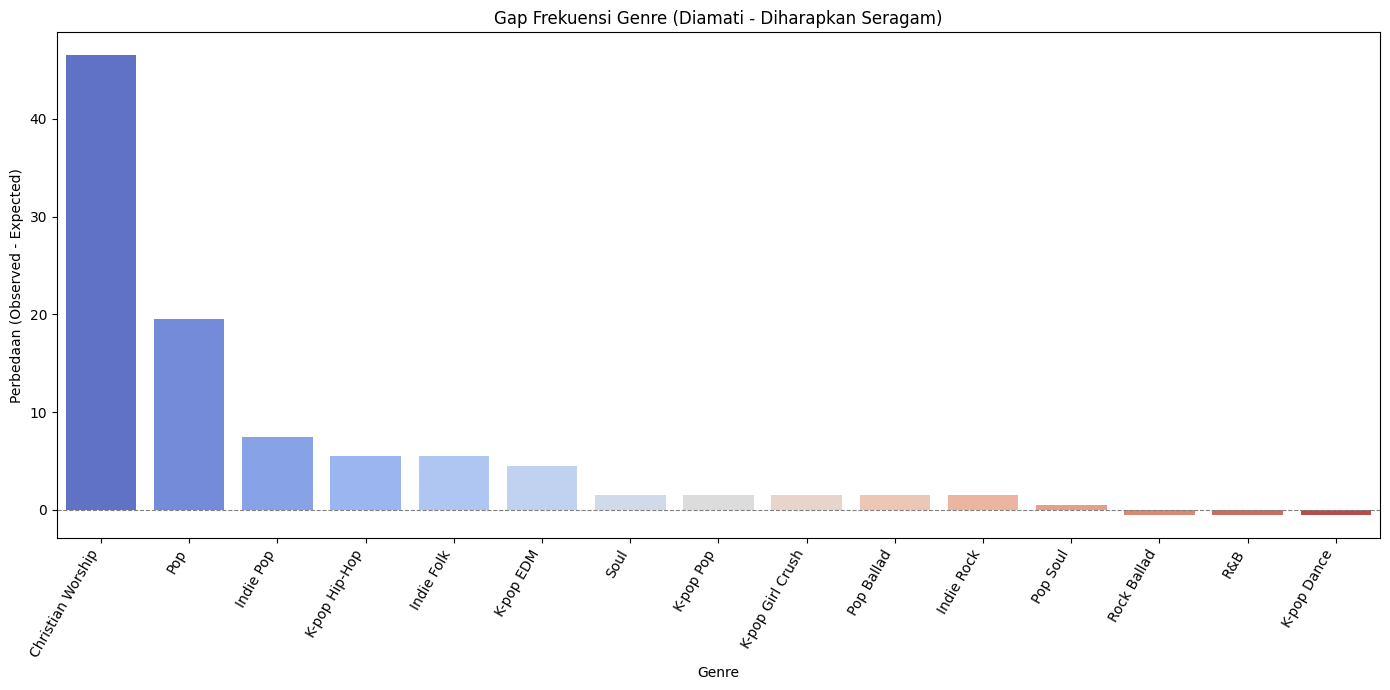

In [ ]:
# Visualisasi 'gap' untuk Genre
plt.figure(figsize=(14, 7))
sns.barplot(x='genre', y='gap', data=viz_df_genre_top.sort_values(by='gap', ascending=False), palette='coolwarm')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.title('Gap Frekuensi Genre (Diamati - Diharapkan Seragam)')
plt.xlabel('Genre')
plt.ylabel('Perbedaan (Observed - Expected)')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3694212498.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='artist', y='gap', data=viz_df_artist_top.sort_values(by='gap', ascending=False), palette='coolwarm')


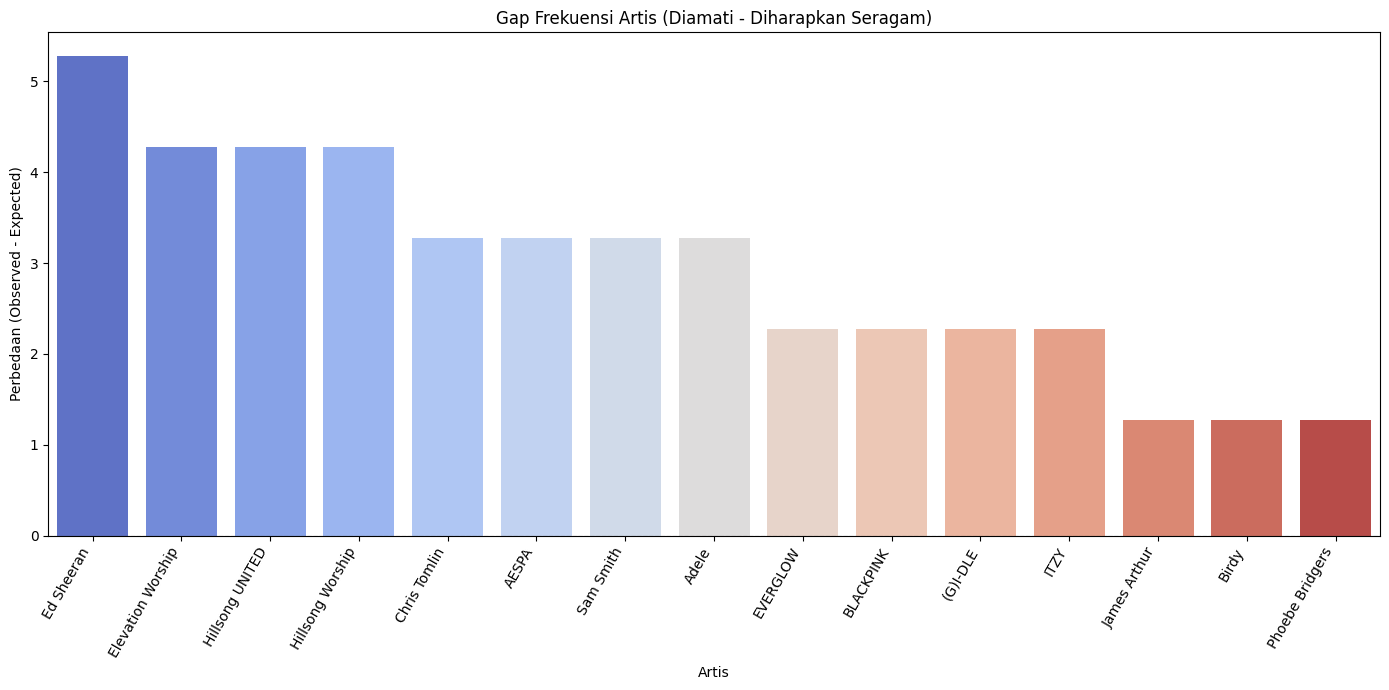

In [ ]:
# Visualisasi 'gap' untuk Artis
plt.figure(figsize=(14, 7))
sns.barplot(x='artist', y='gap', data=viz_df_artist_top.sort_values(by='gap', ascending=False), palette='coolwarm')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.title('Gap Frekuensi Artis (Diamati - Diharapkan Seragam)')
plt.xlabel('Artis')
plt.ylabel('Perbedaan (Observed - Expected)')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

### Penjelasan Mengenai 'Gap' antara Frekuensi Genre/Artis yang Diamati dan Diharapkan

Grafik di atas memvisualisasikan 'gap', yaitu perbedaan antara frekuensi *yang diamati* (berapa kali suatu genre atau artis benar-benar muncul) dengan frekuensi *yang diharapkan secara seragam* (berapa kali suatu genre atau artis akan muncul jika distribusinya merata).

*   **Garis Nol (abu-abu putus-putus):** Ini adalah titik referensi. Jika sebuah batang berada di atas garis nol, artinya genre/artis tersebut muncul **lebih sering** dari yang diharapkan secara seragam. Jika di bawah garis nol, berarti muncul **lebih jarang** dari yang diharapkan.

#### Interpretasi Visualisasi 'Gap' untuk Genre:

grafik diatas kita dapat melihat beberapa genre memiliki batang yang sangat tinggi di atas garis nol (misalnya, 'Christian Worship', 'Pop', 'Indie Pop'). Ini mengindikasikan bahwa genre-genre ini sangat dominan dan memiliki banyak lagu dalam dataset dibandingkan dengan apa yang akan terjadi jika semua genre memiliki jumlah lagu yang sama rata. Beberapa genre di bagian kanan mungkin memiliki batang yang lebih pendek atau bahkan di bawah nol, menandakan bahwa mereka muncul lebih jarang.

Ini dengan jelas menunjukkan adanya **preferensi yang kuat** terhadap genre-genre tertentu dalam dataset Anda, sejalan dengan hasil uji Chi-kuadrat sebelumnya yang menyatakan bahwa distribusi genre **berbeda secara signifikan** dari seragam.

#### Interpretasi Visualisasi 'Gap' untuk Artis:

Hasil visual menunjukkan bahwa distribusi artis relatif merata. Batang-batang pada grafik tidak menyimpang jauh dari garis nol, menandakan bahwa perbedaan kemunculan antar artis hanya kecil dan masih wajar. Tidak ada artis yang sangat dominan ataupun sangat jarang muncul. Pola ini sejalan dengan hasil uji Chi-kuadrat yang menyatakan bahwa distribusi artis tidak berbeda signifikan dari distribusi seragam. Dengan kata lain, kemunculan artis dalam data ini dapat dianggap cukup acak dan tidak menunjukkan adanya bias tertentu.

Song transitions calculated for all shuffles.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


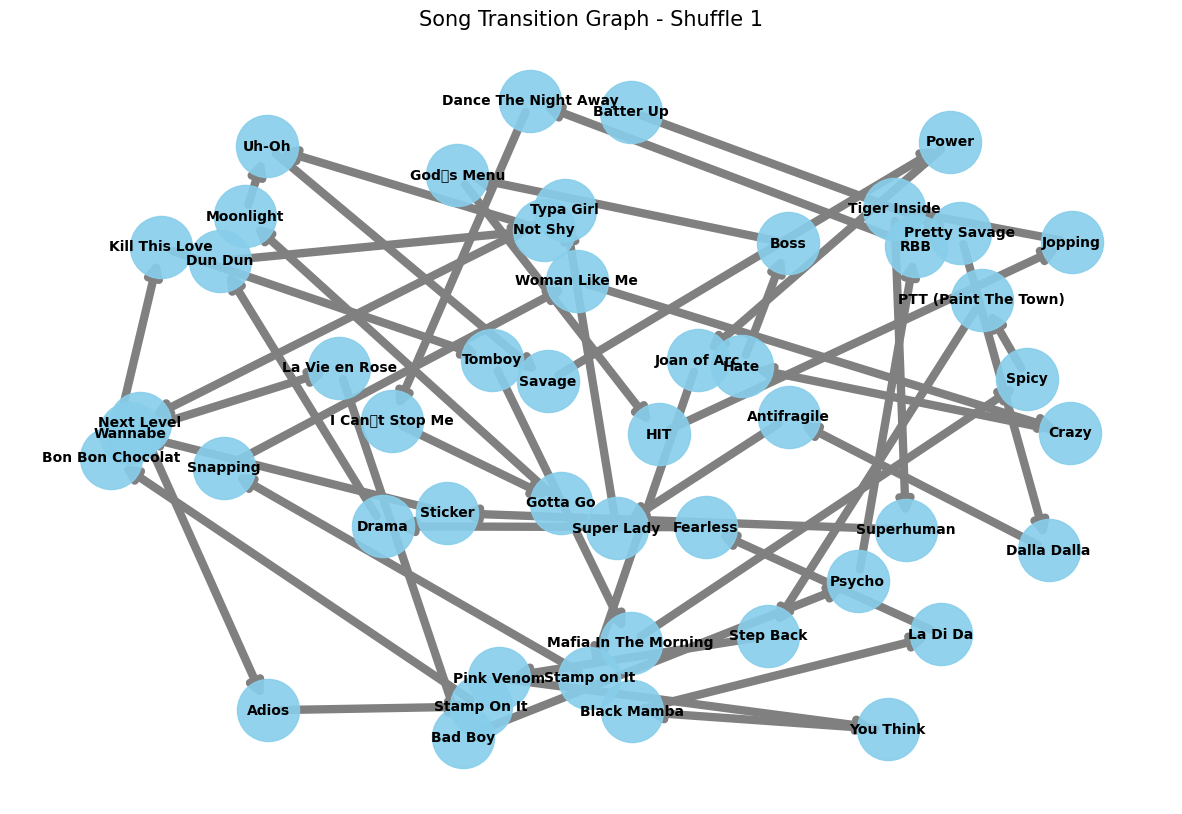

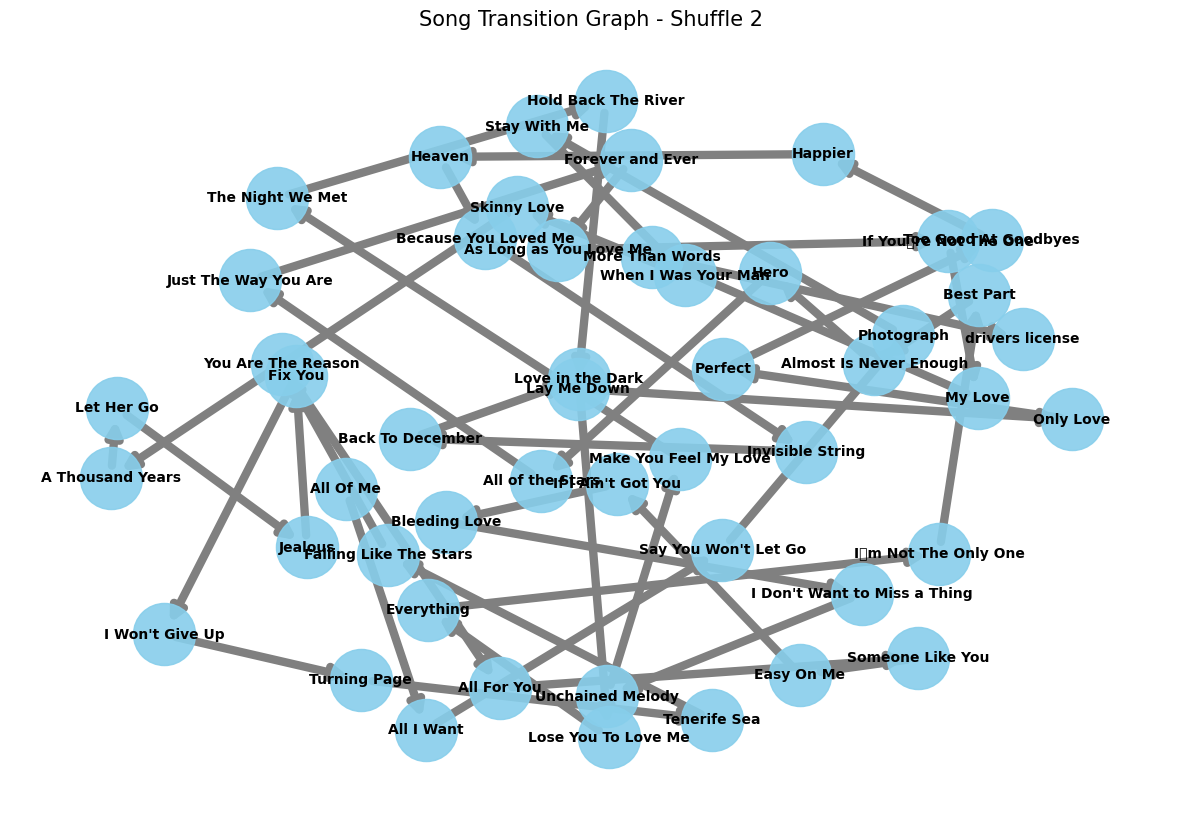

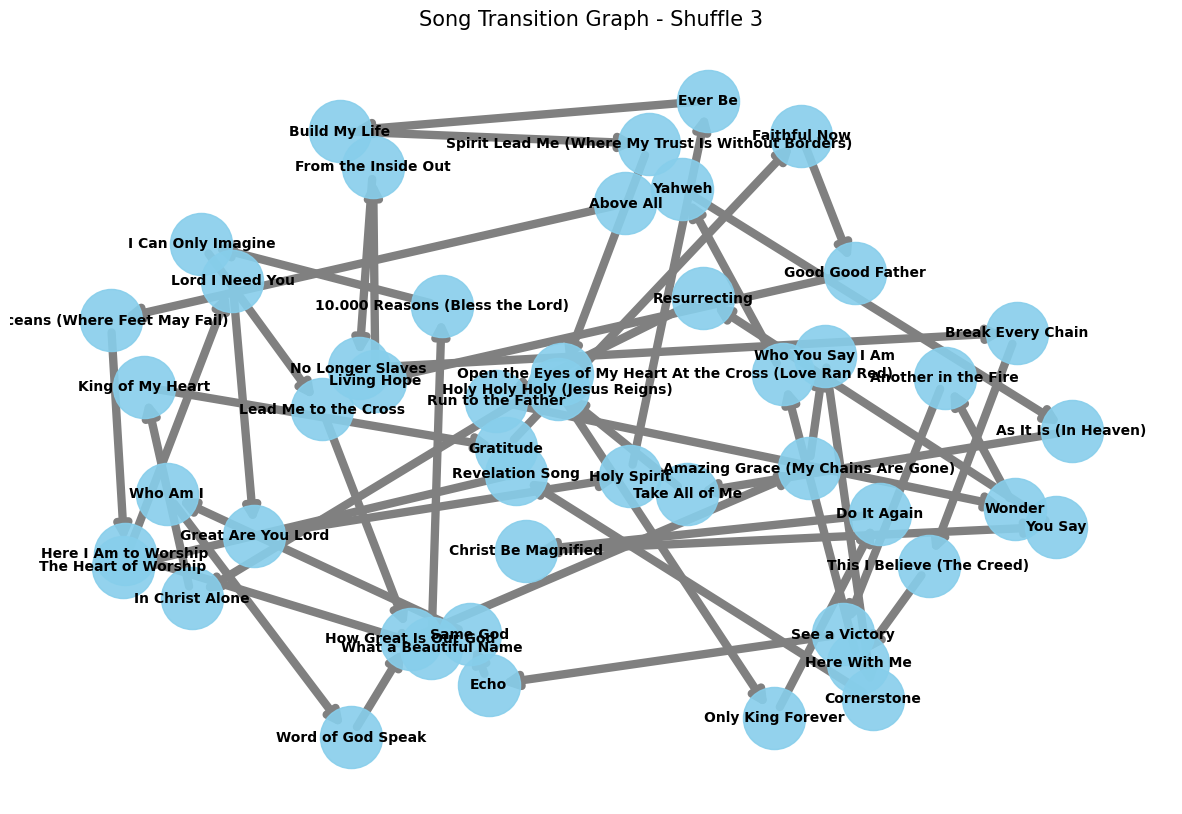

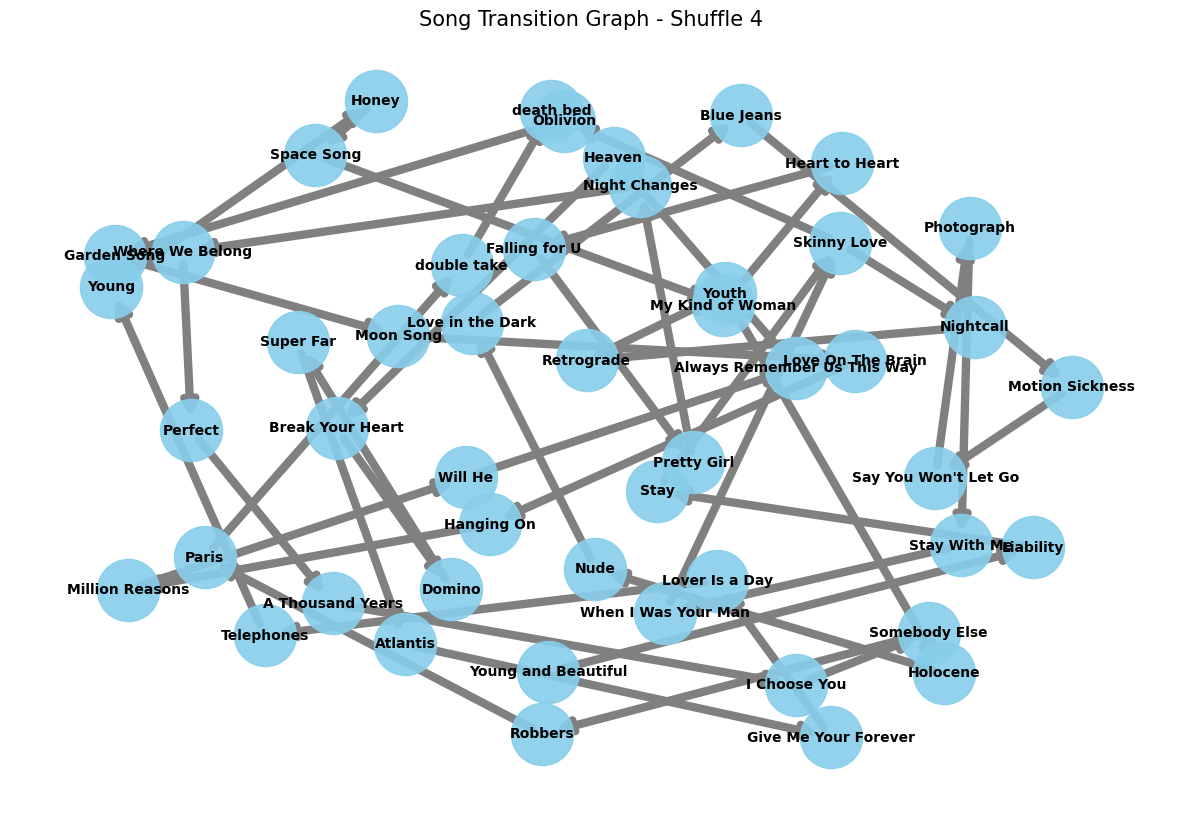

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Calculate song transitions for each shuffle
all_shuffles_transition_counts = []

for shuffle_df in all_shuffles_long_format:
    # Filter out the header row ('Title') that might be present as a data row
    song_sequence = shuffle_df[shuffle_df['title'] != 'Title']['title'].tolist()

    current_shuffle_transitions = Counter()
    for i in range(len(song_sequence) - 1):
        transition = (song_sequence[i], song_sequence[i+1])
        current_shuffle_transitions[transition] += 1
    all_shuffles_transition_counts.append(current_shuffle_transitions)

print("Song transitions calculated for all shuffles.")

# Original visualization code (now with all_shuffles_transition_counts defined)
for idx, shuffle_transition_counts in enumerate(all_shuffles_transition_counts):
    shuffle_number = idx + 1 # Start shuffle numbering from 1

    # Create a directed graph
    G = nx.DiGraph()

    # Add edges with weights (transition counts)
    edge_weights = []
    for (from_song, to_song), count in shuffle_transition_counts.items():
        G.add_edge(from_song, to_song, weight=count)
        edge_weights.append(count)

    if not G.edges():
        print(f"Shuffle {shuffle_number}: No transitions to visualize.")
        continue

    # Scale edge weights for visualization (e.g., thickness)
    # Avoid division by zero if all counts are 0, or if max_weight is 0
    max_weight = max(edge_weights) if edge_weights else 1
    scaled_edge_widths = [d['weight'] / max_weight * 5 + 1 for u, v, d in G.edges(data=True)] # Scale between 1 and 6

    # Determine positions for nodes using a spring layout for better spread
    pos = nx.spring_layout(G, k=0.8, iterations=50)

    # Create figure and axes for the plot
    plt.figure(figsize=(15, 10))

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='skyblue', alpha=0.9)

    # Draw edges with scaled widths
    nx.draw_networkx_edges(G, pos, width=scaled_edge_widths, edge_color='gray', arrows=True, arrowsize=20)

    # Draw node labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    # Add edge labels (transition counts) if desired for more detail
    # edge_labels = nx.get_edge_attributes(G, 'weight')
    # nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.title(f'Song Transition Graph - Shuffle {shuffle_number}', size=15)
    plt.axis('off') # Turn off the axis
    plt.show()

- Shuffle 1 Lagu K-POP

Pada grafik Shuffle 1, terlihat bahwa hubungan antar lagu membentuk jaringan yang cukup padat. Banyak lagu saling terhubung, menandakan transisi antar lagu relatif acak dan berpindah-pindah antar artis maupun antar album. Beberapa lagu tampak memiliki lebih banyak panah masuk/keluar, artinya lagu tersebut sering muncul sebagai penghubung dalam urutan pemutaran. Secara umum, pola Shuffle 1 menunjukkan perpindahan yang dinamis tanpa pusat dominasi tertentu.

- Shuffle 2  Lagu Pop Barat Ballad / Slow Pop

Pada Shuffle 2, struktur graf terlihat lebih rapi dan teratur dibanding Shuffle 1. Banyak lagu saling terhubung tetapi pergerakan transisinya cenderung lebih “mengalir” atau berkelompok. Ini menunjukkan bahwa shuffle memutar lagu-lagu dengan nada dan suasana serupa secara berdekatan. Beberapa lagu populer seperti All of Me, Perfect, dan Photograph tampak sebagai titik transisi yang sering muncul, tetapi tidak mendominasi secara berlebihan.

- Shuffle 3  Lagu Rohani / Worship

Grafik Shuffle 3 menunjukkan hubungan yang cukup rapat, tetapi lebih terfokus pada beberapa lagu inti. Lagu-lagu seperti 10,000 Reasons, Build My Life, dan Cornerstone tampak sebagai node yang memiliki banyak koneksi, menandakan sering menjadi penghubung ke lagu lain. Transisinya tampak lebih teratur dan searah, mencerminkan karakteristik playlist worship yang umumnya memiliki suasana stabil atau tematik.

- Shuffle 4  Indie / Alternative / Lagu Campuran Mood Chill

Pada Shuffle 4, jaringan terlihat lebih menyebar dan tidak terlalu padat. Lagu-lagu membentuk kelompok kecil, menandakan bahwa shuffle cenderung beralih di dalam cluster lagu yang tema atau suasananya mirip sebelum melompat ke cluster lainnya. Tidak ada satu lagu yang terlihat terlalu dominan. Polanya menunjukkan variasi perpindahan yang cukup merata, tetapi tidak seacak Shuffle pertama

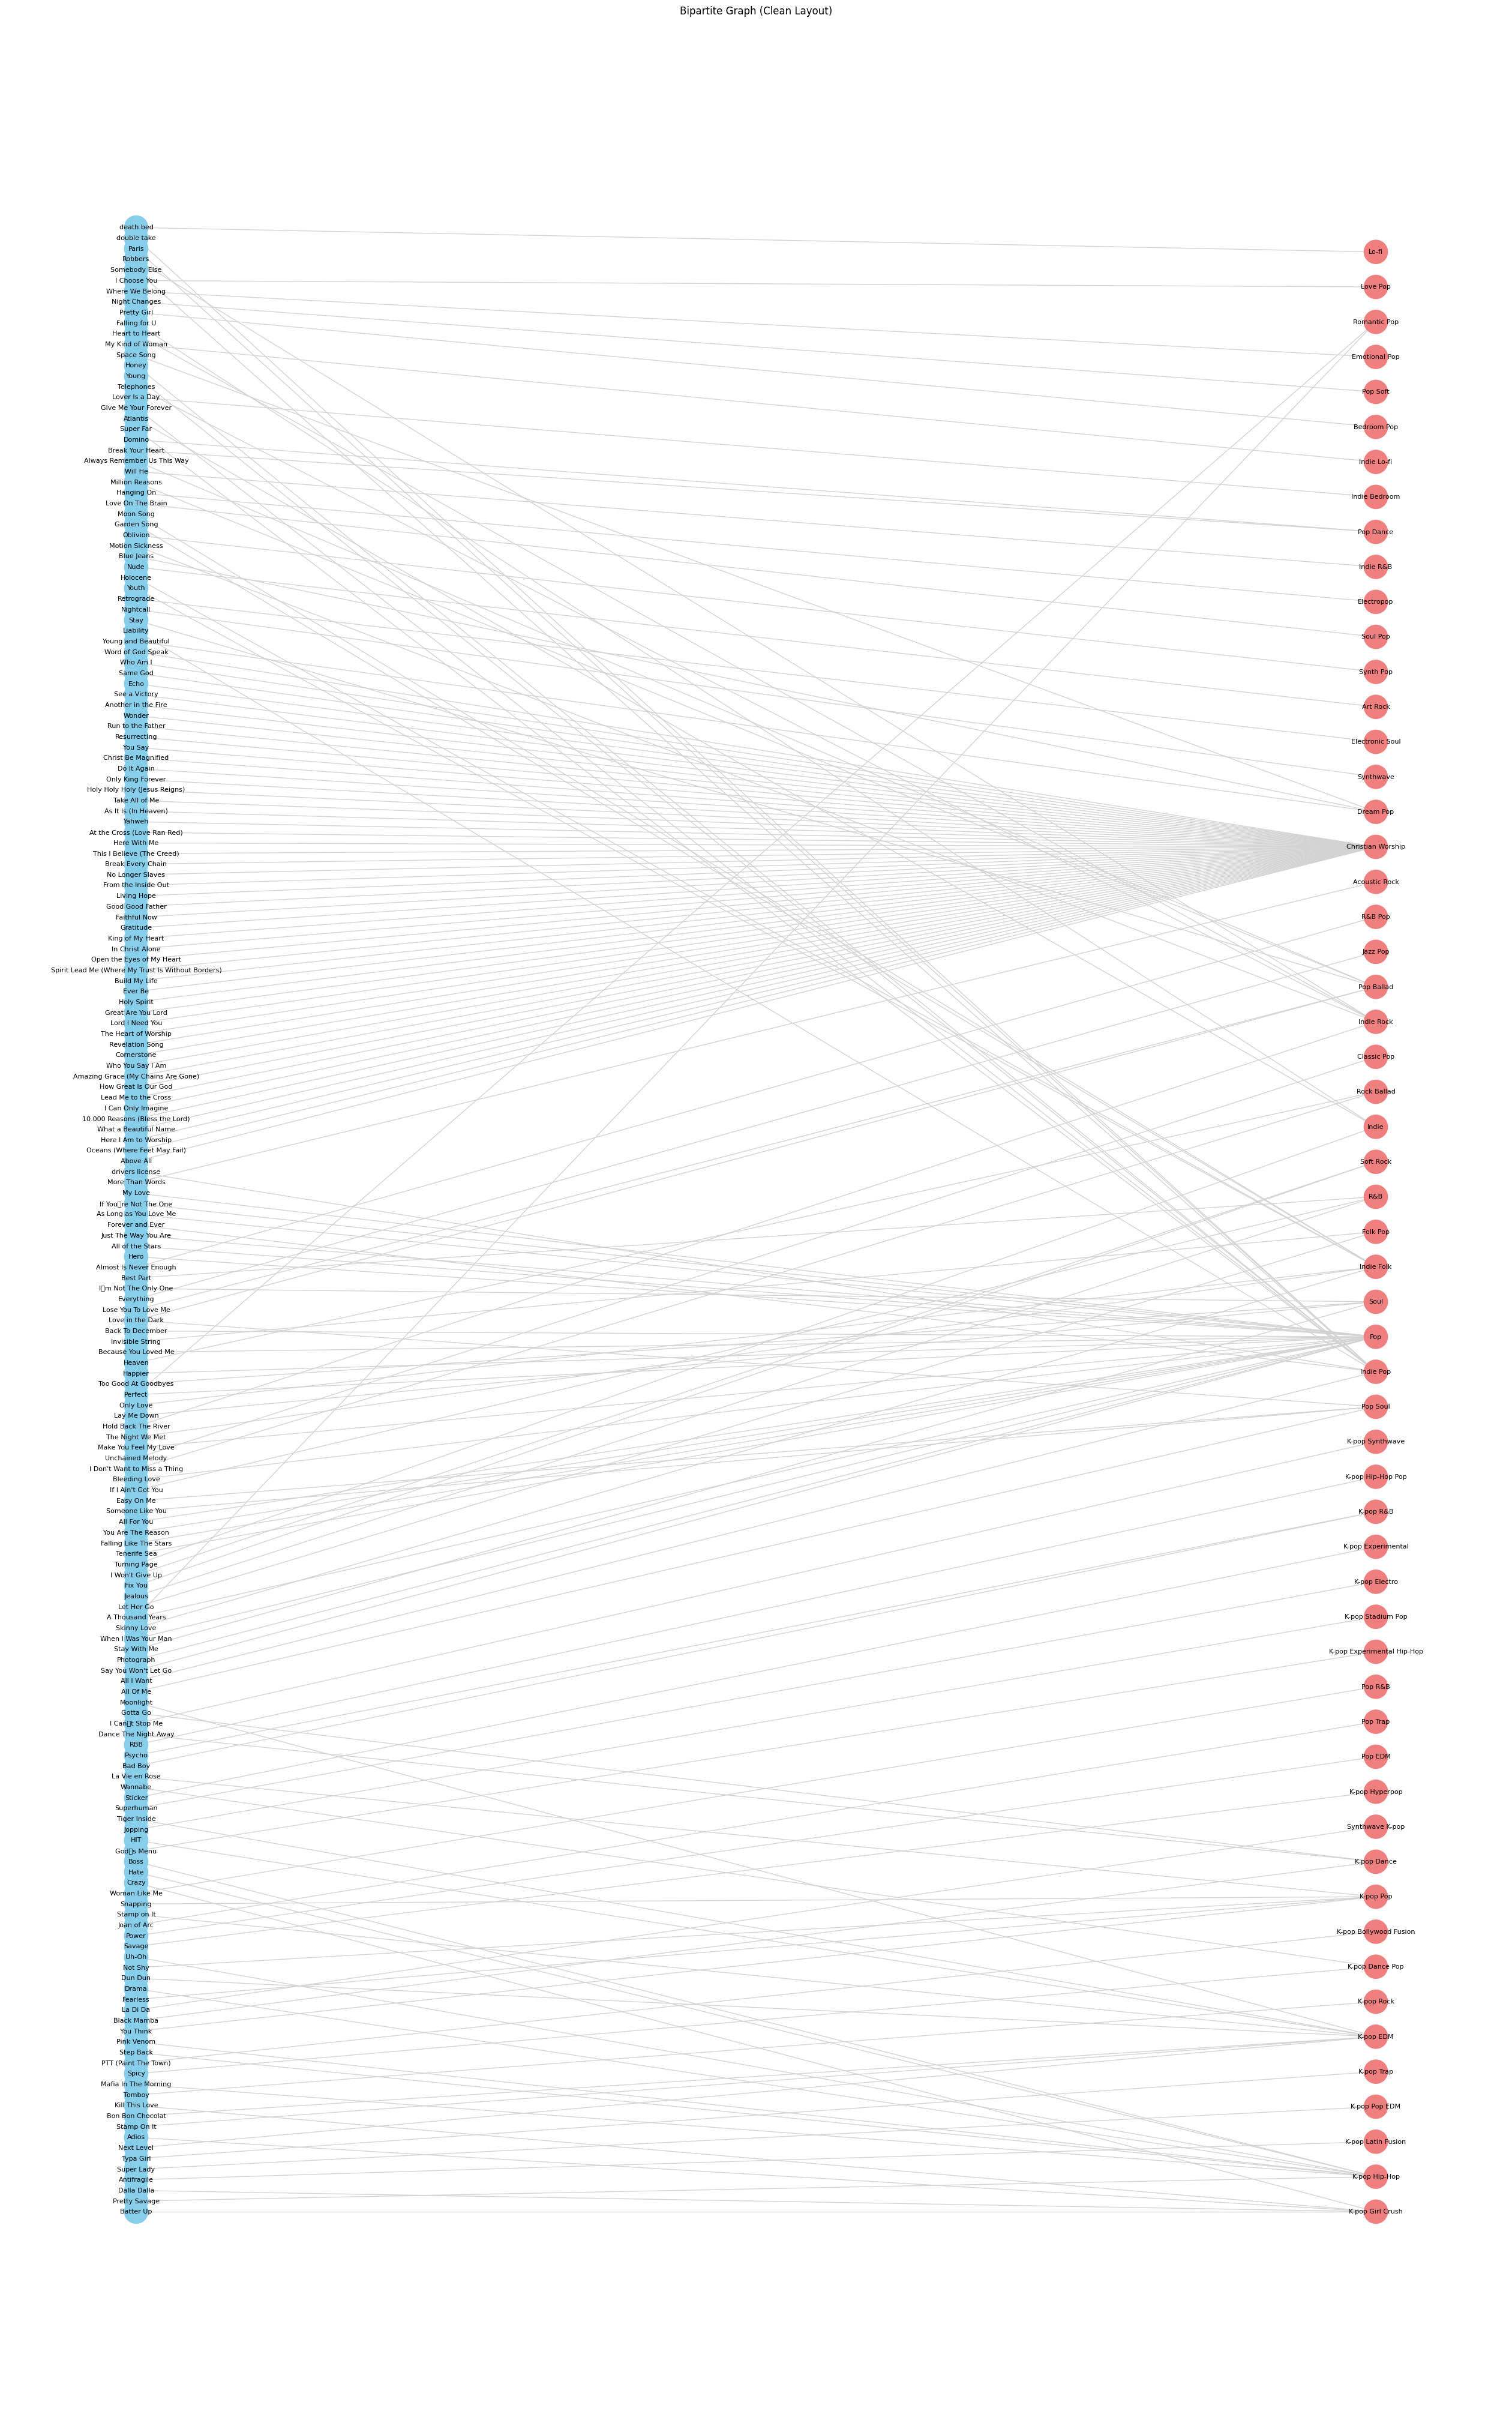

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Ensure df_filtered is available
# from kernel state, df_filtered is available and contains 'title' and 'genre' columns.

# Create the list of edges (song, genre) from df_filtered
edges = []
for index, row in df_filtered.iterrows():
    edges.append((row['title'], row['genre']))

B = nx.Graph()
B.add_nodes_from(unique_songs, bipartite=0)
B.add_nodes_from(unique_genres, bipartite=1)
B.add_edges_from(edges)

# --- Custom layout manual ---
pos = {}

# Songs di kiri
y_step = 1 / len(unique_songs)
for i, s in enumerate(unique_songs):
    pos[s] = (0, i * y_step)

# Genres di kanan
y_step2 = 1 / len(unique_genres)
for i, g in enumerate(unique_genres):
    pos[g] = (1, i * y_step2)

# --- Plot ---
plt.figure(figsize=(25, 40))

nx.draw(
    B, pos,
    with_labels=True,
    node_size=800,
    font_size=8,
    node_color=["skyblue" if n in unique_songs else "lightcoral" for n in B.nodes()],
    edge_color="lightgray",
)

plt.title("Bipartite Graph (Clean Layout)")
plt.axis("off")
plt.show()

grafik diatas menampilakn node genre yang terlihat lebih sedikit dan lebih besar. Hal ini karena jumlah genre memang lebih sedikit dibanding lagu, sehingga tiap genre menerima banyak koneksi dari lagu.

Grafik bipartit ini menunjukkan bahwa banyak lagu terfokus pada beberapa genre tertentu, sementara genre lain hanya memiliki sedikit representasi. Pola ini menguatkan hasil statistik bahwa distribusi genre tidak merata dan cenderung didominasi oleh genre-genre populer dalam dataset.

### Kesimpulan Umum Mengenai Pola Shuffle

Dari seluruh analisis yang telah dijalankan, dapat disimpulkan bahwa **mode shuffle dalam dataset ini tidak sepenuhnya acak**, khususnya dalam hal distribusi genre. Meskipun mungkin dirancang untuk memutar lagu secara acak, temuan menunjukkan adanya bias yang signifikan terhadap genre-genre tertentu. Hal ini berarti bahwa pengalaman pengguna yang merasa beberapa jenis lagu muncul lebih sering adalah valid, karena genre seperti 'Christian Worship', 'Pop', dan 'Indie Pop' memang jauh lebih dominan.

Sebaliknya, distribusi artis cenderung lebih merata, menunjukkan bahwa algoritma mungkin berhasil menyebarkan kemunculan artis secara lebih seimbang. Pola transisi antar lagu bervariasi dari satu sesi ke sesi lainnya, mengindikasikan bahwa karakteristik playlist (misalnya, genre homogen vs. heterogen) sangat memengaruhi dinamika dan keteraturan perpindahan lagu. Ini menunjukkan bahwa 'keacakan' mode shuffle bisa sangat bervariasi tergantung pada komposisi daftar putar itu sendiri.

##LINK PPT

https://www.canva.com/design/DAG5Zz4MIzs/kIA0x8tBn7sUalJsv39kqA/edit?utm_content=DAG5Zz4MIzs&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton
